## Import libraries needed 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and preview the dataset

In [13]:
#Load the dataset
df = pd.read_csv('/Users/dianaterraza/Desktop/webeet.io/data/high-school-directory.csv')

In [14]:
df

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,3.0,135.0,1083802.0,1.010790e+09,Clinton ...,12081.0,12,4,10,10
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...,10935.0,50,5,42,27
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...,11724.0,71,4,50,7


In [15]:
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## Clean column names

In [16]:
#Without cleaning the column names 
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '')
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [39]:
new_column_names = []

In [40]:
for col in df.columns:
    stripped_name = col.lower().strip().replace(' ', '_')
    new_column_names.append(stripped_name)
print(stripped_name, 'appended to new_col_names')

police_precincts appended to new_col_names


In [41]:
new_column_names

['dbn',
 'school_name',
 'borough',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max',
 'bus',
 'subway',
 'primary_address_line_1',
 'city',
 'state_code',
 'postcode',
 'website',
 'total_students',
 'campus_name',
 'school_type',
 'overview_paragraph',
 'program_highlights',
 'language_classes',
 'advancedplacement_courses',
 'online_ap_courses',
 'online_language_courses',
 'extracurricular_activities',
 'psal_sports_boys',
 'psal_sports_girls',
 'psal_sports_coed',
 'school_sports',
 'partner_cbo',
 'partner_hospital',
 'partner_highered',
 'partner_cultural',
 'partner_nonprofit',
 'partner_corporate',
 'partner_financial',
 'partner_other',
 'addtl_info1',
 'addtl_info2',
 'start_time',
 'end_time',
 'se_services',
 'ell_programs',
 'school_accessibility_description',
 'number_programs',
 'priority01',
 'priority02',
 'priority03',
 'priority04',
 'priority05',
 'priority06',
 'priority07',
 'priori

In [42]:
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [43]:
df.dtypes

dbn                        object
school_name                object
borough                    object
building_code              object
phone_number               object
                           ...   
zip_codes                 float64
community_districts         int64
borough_boundaries          int64
city_council_districts      int64
police_precincts            int64
Length: 69, dtype: object

## Perform basic filtering and group-based summaries

### Filter schools with more than 1,000 students

In [44]:
large_schools = df[df['total_students'] > 1000]
large_schools

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
13,28Q440,Forest Hills High School,Queens,Q440,718-268-3137,718-793-7850,9.0,12,NaN,NaN,...,29.0,747.0,4052143.0,4.021890e+09,Forest Hills ...,14786.0,40,3,28,70
27,26Q566,"Queens High School of Teaching, Liberal Arts a...",Queens,Q566,718-736-7100,718-736-7117,9.0,12,NaN,NaN,...,23.0,1567.0,4529899.0,4.078700e+09,Bellerose ...,24335.0,63,3,16,63
28,03M479,Beacon High School,Manhattan,M837,212-245-2807,212-245-2179,9.0,12,NaN,NaN,...,6.0,151.0,1030328.0,1.011540e+09,Lincoln Square ...,12420.0,20,4,19,12
30,10X141,Riverdale / Kingsbridge Academy (Middle School...,Bronx,X141,718-796-8516,718-796-8657,6.0,12,NaN,NaN,...,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,11272.0,48,5,40,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,10X440,DeWitt Clinton High School,Bronx,X440,718-543-1000,718-548-0036,9.0,12,NaN,NaN,...,11.0,409.0,2095215.0,2.032510e+09,Van Cortlandt Village ...,11606.0,24,5,40,34
414,19K615,Transit Tech Career and Technical Education Hi...,Brooklyn,K615,718-647-5204,718-647-4458,9.0,12,NaN,NaN,...,37.0,1196.0,3327249.0,3.041550e+09,East New York ...,17215.0,45,2,37,47
416,22K425,James Madison High School,Brooklyn,K425,718-758-7200,718-758-7341,9.0,12,NaN,NaN,...,48.0,642.0,3182721.0,3.067880e+09,Madison ...,13512.0,32,2,15,36
418,27Q475,Richmond Hill High School,Queens,Q475,718-846-3335,718-847-0980,9.0,12,NaN,NaN,...,28.0,124.0,4195688.0,4.093210e+09,Richmond Hill ...,24014.0,46,3,46,60


### Filter schools in a specific borough (e.g. "Bronx")

In [45]:
bronx_schools = df[df['borough'] == 'Bronx']
bronx_schools.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
6,11X509,High School of Language and Innovation,Bronx,X415,718-944-3625,718-944-3641,9.0,12,NaN,NaN,...,13.0,324.0,2050179.0,2.043580e+09,Bronxdale ...,11607.0,59,5,12,32
8,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9.0,11,9.0,12.0,...,13.0,194.0,2074045.0,2.053680e+09,Schuylerville-Throgs Neck-Edgewater Park ...,11270.0,43,5,12,28
14,08X367,"Archimedes Academy for Math, Science and Techn...",Bronx,X174,718-617-5046,718-617-7395,6.0,12,NaN,NaN,...,18.0,4.0,2020580.0,2.034780e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
17,08X561,Bronx Compass High School,Bronx,X450,718-828-1206,718-828-3732,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26


### Filter schools that offer ELL (English Language Learner) programs

In [46]:
df.ell_programs

0      ESL
1      ESL
2      ESL
3      ESL
4      ESL
      ... 
430    ESL
431    ESL
432    ESL
433    ESL
434    ESL
Name: ell_programs, Length: 435, dtype: object

In [47]:
ell_schools = df[df['ell_programs'].notna()]
ell_schools.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## Visualizations

In [48]:
# Grouped summaries
borough_summary = df.groupby('borough').agg(
    total_students=('total_students', 'sum'),
    ap_schools=('advancedplacement_courses', lambda x: x.notna().sum()),
    ell_schools=('ell_programs', lambda x: x.notna().sum()),
    num_schools=('school_name', 'count')
).reset_index()

In [49]:
df.groupby('borough')['total_students'].sum()

borough
Bronx            57868.0
Brooklyn         83197.0
Manhattan        60752.0
Queens           79545.0
Staten Island    18475.0
Name: total_students, dtype: float64

In [50]:
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [28]:
df.groupby(['borough'])['dbn'].nunique() 

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

In [27]:
# Compute average students per school
borough_summary['avg_students_per_school'] = borough_summary['total_students'] / borough_summary['num_schools']

### Total Students by Borough

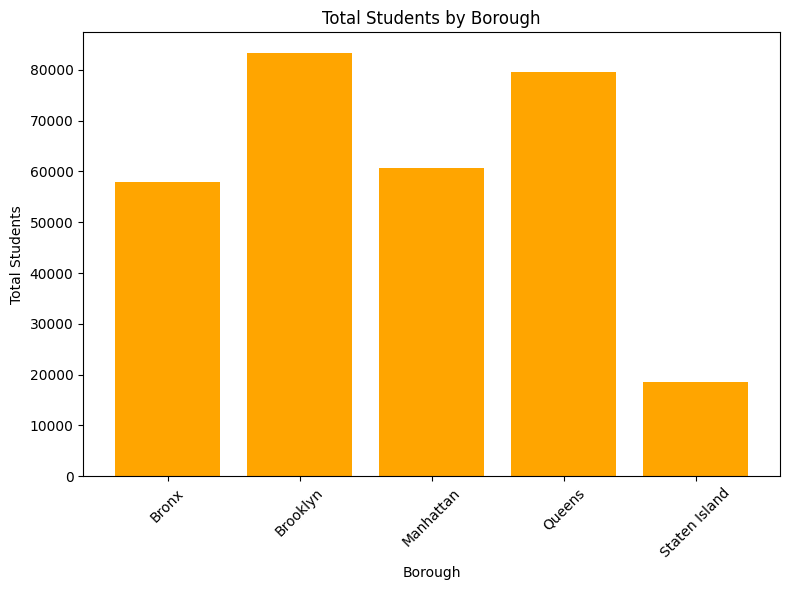

In [49]:
# --- Visualization 1: Total Students by Borough ---
plt.figure(figsize=(8, 6))
plt.bar(borough_summary['borough'], borough_summary['total_students'], color='orange')
plt.title('Total Students by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

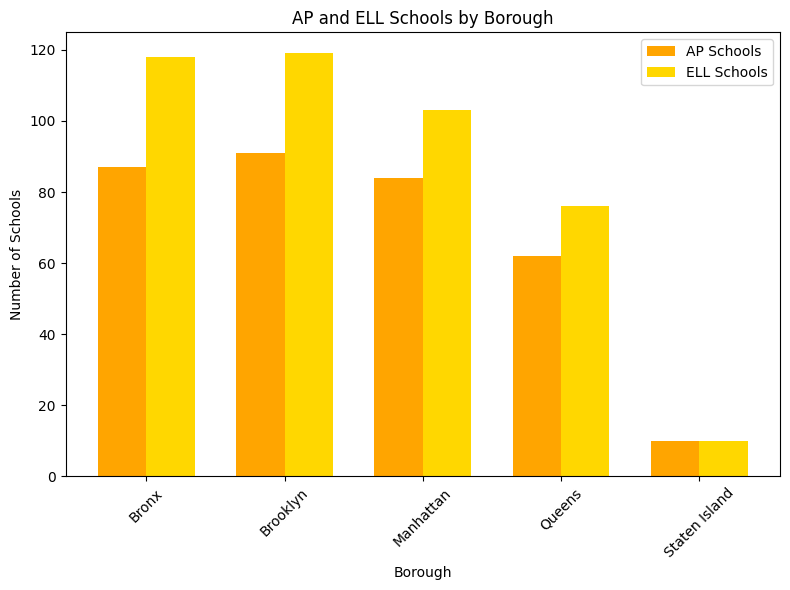

In [50]:
# --- Visualization 2: AP and ELL Schools by Borough ---
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(borough_summary))

plt.bar(index, borough_summary['ap_schools'], bar_width, label='AP Schools', color='orange')
plt.bar(
    [i + bar_width for i in index],
    borough_summary['ell_schools'],
    bar_width,
    label='ELL Schools',
    color='gold'  # yellow tone
)

plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.title('AP and ELL Schools by Borough')
plt.xticks([i + bar_width / 2 for i in index], borough_summary['borough'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


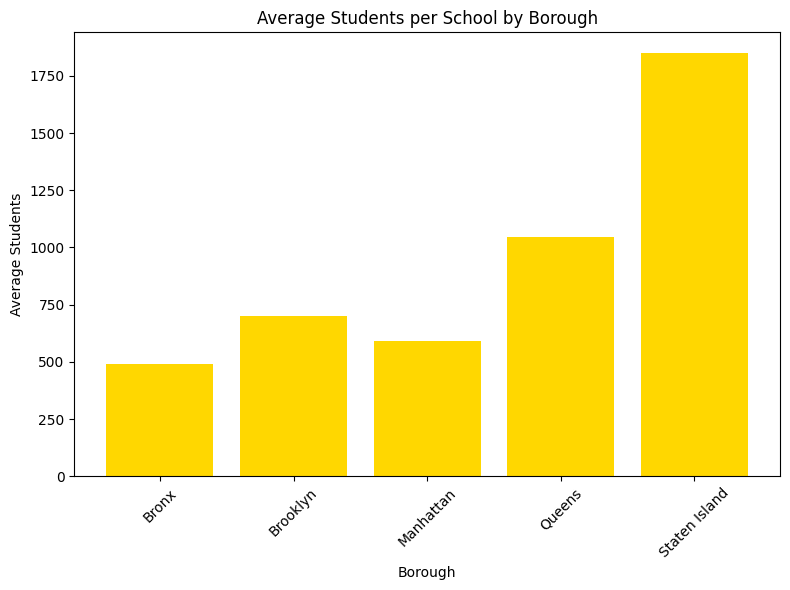

In [51]:
# --- Visualization 3: Average Students per School by Borough ---
plt.figure(figsize=(8, 6))
plt.bar(borough_summary['borough'], borough_summary['avg_students_per_school'], color='gold')
plt.title('Average Students per School by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 💡 Insights 

* Brooklyn has the highest number of students (83,197) and the most schools (121), indicating a large, diverse educational landscape.
* Manhattan has a balanced profile with 60,752 students across 106 schools, likely indicating smaller school sizes on average.
* Staten Island has the fewest students (18,475) and the fewest schools (10), pointing to a more limited educational network but the biggest average student per borought.